# Los Angeles Crime Data(2020 - 2024)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/ASUS/Documents/Tableau Local Files/Datasets/LA_Crime_Data_from_2020_to_Present.csv')

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


- Time occ(occured) is for date occ(occured)
- A lot of work must be done on dates and time columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           944235 non-null  int64  
 1   Date Rptd       944235 non-null  object 
 2   DATE OCC        944235 non-null  object 
 3   TIME OCC        944235 non-null  int64  
 4   AREA            944235 non-null  int64  
 5   AREA NAME       944235 non-null  object 
 6   Rpt Dist No     944235 non-null  int64  
 7   Part 1-2        944235 non-null  int64  
 8   Crm Cd          944235 non-null  int64  
 9   Crm Cd Desc     944235 non-null  object 
 10  Mocodes         811136 non-null  object 
 11  Vict Age        944235 non-null  int64  
 12  Vict Sex        817640 non-null  object 
 13  Vict Descent    817630 non-null  object 
 14  Premis Cd       944225 non-null  float64
 15  Premis Desc     943668 non-null  object 
 16  Weapon Used Cd  324477 non-null  float64
 17  Weapon Des

In [5]:
#check for nulls
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           133099
Vict Age               0
Vict Sex          126595
Vict Descent      126605
Premis Cd             10
Premis Desc          567
Weapon Used Cd    619758
Weapon Desc       619758
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          875977
Crm Cd 3          941954
Crm Cd 4          944171
LOCATION               0
Cross Street      796643
LAT                    0
LON                    0
dtype: int64

In [6]:
df.shape

(944235, 28)

In [7]:
#checking for duplicates
df.duplicated().sum()

0

Findings
 - Dates and time were not in the correct data type(actions needed)
 - There are columns that contains nulls but no column exist that are completely null
 - No duplicated records exist
 - there are 944,235 records and 28 fields

## Data Cleaning and Transformations

### Working on date columns

In [8]:
#### Date Rptd
##### it is an object(string) data type
df['Date Rptd'].head()

0    03/01/2020 12:00:00 AM
1    02/09/2020 12:00:00 AM
2    11/11/2020 12:00:00 AM
3    05/10/2023 12:00:00 AM
4    08/18/2022 12:00:00 AM
Name: Date Rptd, dtype: object

- the date formate is mm/dd/yyyy
- there is a time stamp but it seams to be irrelevant but would need more inspection

In [9]:
#will perform column splitting
date_rtp_split = df['Date Rptd'].str.split(" ")

In [10]:
#create series for easy analysis by pandas
date_col = [x[0] for x in date_rtp_split]
date_col = pd.Series(date_col)
time_col = [y[1] for y in date_rtp_split]
time_col = pd.Series(time_col)

In [11]:
#checking if all the lengths are the same
date_col.str.len().unique()

array([10], dtype=int64)

All items are the are of the same lengths

In [12]:
#checking the time_col should we missed something
time_col.unique()

array(['12:00:00'], dtype=object)

The time_col only contains '12am'. No need to include this to main dataframe df

In [13]:
#add to main dataframe
df.insert(loc=4, column='Date Reported', value=date_col)

In [14]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,Date Reported,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,03/01/2020,7,Wilshire,784,1,510,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,02/09/2020,1,Central,182,1,330,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,11/11/2020,3,Southwest,356,1,480,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,05/10/2023,9,Van Nuys,964,1,343,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,08/18/2022,6,Hollywood,666,2,354,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [15]:
#do the same with DATE OCC
date_occ_split = df['DATE OCC'].str.split(" ")

date_col = [x[0] for x in date_occ_split]
date_col = pd.Series(date_col)
time_col = [y[1] for y in date_occ_split]
time_col = pd.Series(time_col)

In [16]:
#checking if all the lengths are the same
date_col.str.len().unique()

array([10], dtype=int64)

In [17]:
#checking the time_col should we missed something
time_col.unique()

array(['12:00:00'], dtype=object)

In [18]:
#add to main dataframe
df.insert(loc=5, column='Date Occured', value=date_col)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,03/01/2020,03/01/2020,7,Wilshire,784,1,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,02/09/2020,02/08/2020,1,Central,182,1,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,11/11/2020,11/04/2020,3,Southwest,356,1,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,05/10/2023,03/10/2020,9,Van Nuys,964,1,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,08/18/2022,08/17/2020,6,Hollywood,666,2,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,02/20/2024,02/17/2024,21,Topanga,2103,1,...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,01/16/2024,01/16/2024,20,Olympic,2013,2,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,01/15/2024,01/15/2024,1,Central,101,2,...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,04/24/2024,04/24/2024,3,Southwest,358,1,...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [19]:
#drop date rpt and date occ
df = df.drop(columns=['Date Rptd', 'DATE OCC'])
df.head()

,DR_NO,TIME OCC,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2130,03/01/2020,03/01/2020,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,1800,02/09/2020,02/08/2020,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,1700,11/11/2020,11/04/2020,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2037,05/10/2023,03/10/2020,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,1200,08/18/2022,08/17/2020,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [20]:
#analysing "Time OCC" column
time_occ_str = df['TIME OCC'].astype('str') #convert to string and store as new series
time_occ_str.str.len().unique() #find out different lengths

array([4, 3, 1, 2], dtype=int64)

In [21]:
pd.to_datetime('11/11/2020 08')

Timestamp('2020-11-11 08:00:00')

In [22]:
len(time_occ_str[0])

4

In [23]:
time_occ_fixed = [] #empty list

#add '0' if length of string is 1 or 3
for i in time_occ_str:
    if len(i) == 1:
        time_occ_fixed.append('0'+i)
    elif len(i) == 3:
        time_occ_fixed.append('0'+i)
    else:
        time_occ_fixed.append(i)

time_occ_fixed = pd.Series(time_occ_fixed)

In [24]:
time_occ_fixed

0         2130
1         1800
2         1700
3         2037
4         1200
          ... 
944230    2330
944231    1510
944232    0100
944233    1500
944234    2020
Length: 944235, dtype: object

In [25]:
#concatenate time_occ_fixed to Date Occured
df['Date Occured'] = df['Date Occured'].str.cat(time_occ_fixed, sep=' ')
df

,DR_NO,TIME OCC,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2130,03/01/2020,03/01/2020 2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,1800,02/09/2020,02/08/2020 1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,1700,11/11/2020,11/04/2020 1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2037,05/10/2023,03/10/2020 2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,1200,08/18/2022,08/17/2020 1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,242106032,2330,02/20/2024,02/17/2024 2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,1510,01/16/2024,01/16/2024 1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,100,01/15/2024,01/15/2024 0100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,1500,04/24/2024,04/24/2024 1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [26]:
#covert dates columns into the correct data types
df['Date Reported'] = pd.to_datetime(df['Date Reported'], dayfirst=False)
df['Date Occured'] = pd.to_datetime(df['Date Occured'], dayfirst=False)
df

,DR_NO,TIME OCC,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2130,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,1800,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,1700,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2037,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,1200,2022-08-18,2020-08-17 12:00:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,242106032,2330,2024-02-20,2024-02-17 23:30:00,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,1510,2024-01-16,2024-01-16 15:10:00,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,100,2024-01-15,2024-01-15 01:00:00,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,1500,2024-04-24,2024-04-24 15:00:00,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [27]:
#drop time occ column
df = df.drop(columns='TIME OCC')
df.head()

,DR_NO,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17 12:00:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [28]:
#checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           944235 non-null  int64         
 1   Date Reported   944235 non-null  datetime64[ns]
 2   Date Occured    944235 non-null  datetime64[ns]
 3   AREA            944235 non-null  int64         
 4   AREA NAME       944235 non-null  object        
 5   Rpt Dist No     944235 non-null  int64         
 6   Part 1-2        944235 non-null  int64         
 7   Crm Cd          944235 non-null  int64         
 8   Crm Cd Desc     944235 non-null  object        
 9   Mocodes         811136 non-null  object        
 10  Vict Age        944235 non-null  int64         
 11  Vict Sex        817640 non-null  object        
 12  Vict Descent    817630 non-null  object        
 13  Premis Cd       944225 non-null  float64       
 14  Premis Desc     943668 non-null  obj

In [29]:
#performing basic stats
df.describe()

,DR_NO,Date Reported,Date Occured,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.442350e+05,944235,944235,944235.00000,944235.000000,944235.000000,944235.000000,944235.000000,944225.000000,324477.000000,944224.000000,68258.000000,2281.000000,64.00000,944235.000000,944235.000000
mean,2.188777e+08,2022-04-02 12:56:47.238239488,2022-03-22 14:54:29.081445888,10.72113,1118.554020,1.409594,500.810848,29.499314,306.554488,363.710143,500.556373,958.083639,984.021920,991.21875,33.992364,-118.070963
min,8.170000e+02,2020-01-01 00:00:00,2020-01-01 00:01:00,1.00000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105081e+08,2021-03-23 00:00:00,2021-03-08 23:30:00,6.00000,622.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430700
50%,2.206203e+08,2022-04-24 00:00:00,2022-04-09 22:30:00,11.00000,1142.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.307061e+08,2023-04-22 00:00:00,2023-04-10 16:51:00,16.00000,1619.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.274000
max,2.499138e+08,2024-05-13 00:00:00,2024-05-13 21:50:00,21.00000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000
std,1.246230e+07,NaN,NaN,6.09928,609.969102,0.491759,207.283501,21.882246,217.561137,123.570915,207.076911,110.336391,51.798407,27.06985,1.670190,5.789397


There is something odd in the vict age column. the minimum age is -4 and the max age is 120

In [30]:
#checking the records with odd age
df.loc[(df['Vict Age'] == -4) | (df['Vict Age'] == 120)]

,DR_NO,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
196724,200808494,2020-04-19,2020-04-19 21:45:00,8,West LA,889,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0430 1300 1310 1402 0906 1822,...,IC,Invest Cont,230.0,998.0,NaN,NaN,2000 S BEDFORD ST,NaN,34.0416,-118.3836
199350,240106628,2024-01-22,2020-01-01 12:00:00,1,Central,112,2,622,BATTERY ON A FIREFIGHTER,1822 0701 0800 0100,...,IC,Invest Cont,622.0,NaN,NaN,NaN,300 N SPRING ST,NaN,34.0549,-118.2426
199352,240106626,2020-12-31,2020-01-01 12:00:00,1,Central,112,2,662,"BUNCO, GRAND THEFT",0701 0800 0100 1822,...,IC,Invest Cont,662.0,NaN,NaN,NaN,300 N SPRING ST,NaN,34.0549,-118.2426
199368,240106627,2024-01-22,2020-01-01 12:00:00,1,Central,112,2,662,"BUNCO, GRAND THEFT",1820 1000 0800 0701,...,IC,Invest Cont,662.0,NaN,NaN,NaN,300 N SPRING ST,NaN,34.0549,-118.2426


There are four records of odd age

In [31]:
import matplotlib.pyplot as plt

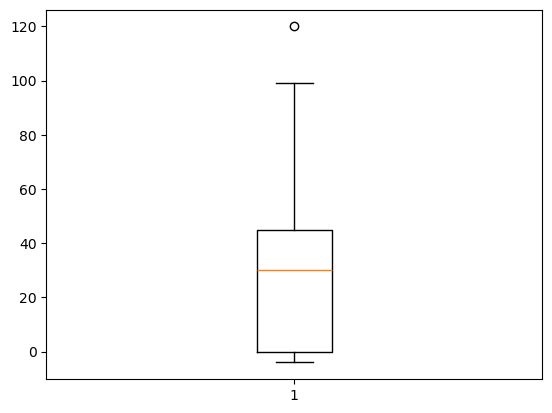

In [32]:
plt.boxplot(df['Vict Age'])
plt.show()

The plot above shows outliers. We will keep these data to be inspected further.

## Exporting data

In [33]:
#df.to_csv('LA_Crime_Data_from_2020_to_Present-CLEANED.csv')

Exporting year 2023

In [34]:
#df[df['Date Reported'].dt.year == 2023].to_csv('LA_Crime_Data_2023-CLEANED.csv')

In [35]:
df_2023 = df[df['Date Reported'].dt.year == 2023]

In [36]:
df_2023.shape

(234649, 27)

In [37]:
df_2023['DR_NO'].nunique()

234649

In [38]:
#extracting 2023 to 2024 report data
df_2023_2024 = df[df['Date Reported'].dt.year >= 2023]
df_2023_2024.head()

,DR_NO,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
3,200907217,2023-05-10,2020-03-10 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
5,231808869,2023-04-04,2020-12-01 23:00:00,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,2023-04-04,2020-07-03 09:00:00,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
8,231309864,2023-04-28,2020-12-09 14:00:00,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
12,230204214,2023-01-05,2020-02-01 08:00:00,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,...,IC,Invest Cont,812.0,860.0,NaN,NaN,900 N MARIPOSA AV,NaN,34.0868,-118.2991


In [39]:
df_2023_2024.tail()

,DR_NO,Date Reported,Date Occured,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
944230,242106032,2024-02-20,2024-02-17 23:30:00,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0385,...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,2024-01-16,2024-01-16 15:10:00,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,2024-01-15,2024-01-15 01:00:00,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,2024-04-24,2024-04-24 15:00:00,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0416 0445 0449 1202,...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868
944234,240900704,2024-04-29,2024-04-29 20:20:00,9,Van Nuys,916,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0342 0329 1402 0311 1822,...,IC,Invest Cont,740.0,998.0,NaN,NaN,6800 HAZELTINE AV,NaN,34.1939,-118.4400


In [40]:
#checking Vict Sex column
df_2023_2024['Vict Sex'].unique()

array(['M', 'F', 'X', nan, 'H', '-'], dtype=object)

In [41]:
#replace nan, H and -
#import numpy
import numpy as np

df_2023_2024['Vict Sex'] = df_2023_2024['Vict Sex'].replace(to_replace=[np.NaN, '-', 'H'], value='DNP')
df_2023_2024['Vict Sex'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11108\1124846017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2024['Vict Sex'] = df_2023_2024['Vict Sex'].replace(to_replace=[np.NaN, '-', 'H'], value='DNP')


array(['M', 'F', 'X', 'DNP'], dtype=object)

In [42]:
#checking vict desc
df_2023_2024['Vict Descent'].unique()

array(['O', 'H', 'B', 'W', 'A', 'X', nan, 'F', 'K', 'J', 'P', 'C', 'V',
       'I', 'D', 'L', 'S', 'U', 'Z', 'G', '-'], dtype=object)

In [43]:
#replace nan and -
df_2023_2024['Vict Descent'] = df_2023_2024.loc[:,'Vict Descent'].replace(to_replace=[np.NaN, '-'], value='DNP')
df_2023_2024['Vict Descent'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11108\3648014113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2024['Vict Descent'] = df_2023_2024.loc[:,'Vict Descent'].replace(to_replace=[np.NaN, '-'], value='DNP')


array(['O', 'H', 'B', 'W', 'A', 'X', 'DNP', 'F', 'K', 'J', 'P', 'C', 'V',
       'I', 'D', 'L', 'S', 'U', 'Z', 'G'], dtype=object)

In [44]:
#export Dataset
#df_2023_2024.to_csv('LA_Crime_Data_2023_2024.csv')

In [52]:
df_2023_2024['Rpt Dist No'].astype('str').str.len().unique()

array([3, 4], dtype=int64)